# Descriptive statistics using Polars or Panda
## IDS 706 Data Engineering Systems
 Author: Tianji Rao

## Contents:
[1.Introduction](#1-introduction)   
[2.Pandas](#2-pandas)

# 1. Introduction

## Import necessary packages

In [1]:
import pandas as pd
import polars as pl


Here, the author used the [`Eletric_Vehicle_Population_Data.csv`](https://catalog.data.gov/dataset/electric-vehicle-population-data) as the sample dataset and performed a series of descriptive statistics. Here we can have a glance at the dataset. All customized functions are from `mylib`, which contains `for_pandas.py` and `for_polars`.

In [2]:
# Using pandas to read .csv file
df = pd.read_csv('Electric_Vehicle_Population_Data.csv').iloc[5:,]
# print data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143591 entries, 5 to 143595
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         143591 non-null  object 
 1   County                                             143569 non-null  object 
 2   City                                               143569 non-null  object 
 3   State                                              143591 non-null  object 
 4   Postal Code                                        143569 non-null  float64
 5   Model Year                                         143591 non-null  int64  
 6   Make                                               143591 non-null  object 
 7   Model                                              143591 non-null  object 
 8   Electric Vehicle Type                              143591 non-null  object

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
5,WB523CF03P,Yakima,Selah,WA,98942.0,2023,BMW,IX,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,236290862,POINT (-120.54187999999999 46.654175000000066),PACIFICORP,5.307700e+10
6,YV4BR0CK2K,King,Bellevue,WA,98004.0,2019,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,0,48.0,125426248,POINT (-122.201905 47.61385),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
7,5YJ3E1EA5K,Thurston,Olympia,WA,98506.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,22.0,477699071,POINT (-122.88747809999995 47.051957300000026),PUGET SOUND ENERGY INC,5.306701e+10
8,5YJ3E1EB6K,Yakima,Yakima,WA,98902.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,14.0,232637037,POINT (-120.52401199999997 46.59739390000004),PACIFICORP,5.307700e+10
9,1N4AZ0CP9G,King,Redmond,WA,98052.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,45.0,178151032,POINT (-122.12302 47.67668),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [4]:
df.shape

(143591, 17)

# 2. Pandas

Since importing data is shown in previous section, we already have a `pd.DataFrame` as our dataset. let's start from using `pandas` to do statistical descripition. Here, we gonna use `pd_desc` from `mylib.lib` to print a series of useful statistics.


## 2.1 Descriptitive Statistics
Here we can use the function `pd_desc` in `lib.py`, this function is based on `pd.DataFrame.describe()`. The code is:

```{python}
def pd_desc(df):
    return df.describe()
```


In [5]:
from mylib.lib import pd_desc

In [6]:
pd_desc(df)

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,143569.000000,143591.000000,143591.000000,143591.000000,143264.000000,1.435910e+05,1.435690e+05
mean,98175.207775,2019.865632,70.494481,1372.947538,29.371698,2.092021e+08,5.297590e+10
std,2383.209689,3.015954,97.128551,9448.499027,14.824054,8.353809e+07,1.594068e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.668336e+08,5.303301e+10
50%,98122.000000,2021.000000,19.000000,0.000000,33.000000,2.111045e+08,5.303303e+10
75%,98370.000000,2022.000000,111.000000,0.000000,43.000000,2.364520e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


## 2.2 Visualization

Using the function `pd_visual` to plot the bar chart. Here is the code for function `pd_visual`:

```{python}
def pd_visual(df):
    df.plot(kind="bar")
    plt.xticks(rotation = 90)
    plt.show()
```



In [18]:
from mylib.lib import pd_visual

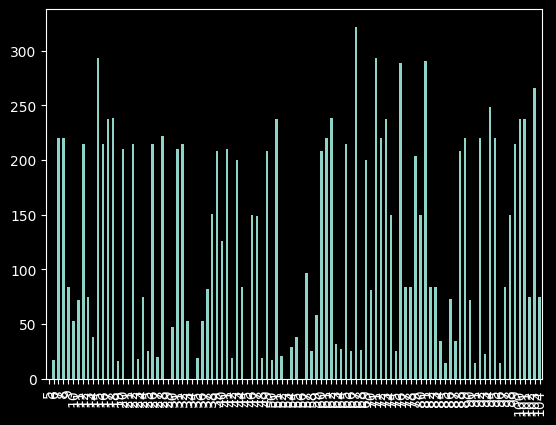

In [19]:
pd_visual(df['Electric Range'][:100])